<a href="https://colab.research.google.com/github/memed01/DataScienceAndBigData/blob/master/Mendi_NLP_20newsgroup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP

The goal is to use one of the classification techniques using embeddings and see if you can outperform the random forest applied to word counts.

In [0]:
from __future__ import print_function

import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant

Using TensorFlow backend.


In [0]:
BASE_DIR = ''
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')
TEXT_DATA_DIR = os.path.join(BASE_DIR, '20_newsgroup')
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2

In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-03-09 02:19:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-09 02:19:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-09 02:19:25--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.300d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

### Let us prepare text samples and their labels

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity we will select just political categories

In [0]:
politics = ['talk.politics.guns','talk.politics.mideast','talk.politics.misc']
newsgroups_train = fetch_20newsgroups(subset='train',categories=politics,shuffle=True)
newsgroups_test = fetch_20newsgroups(subset='test', categories=politics,shuffle=True)

Here is a representative entry from the data

In [0]:
print(newsgroups_train.data[5])

From: dbd@urartu.sdpa.org (David Davidian)
Subject: Lezgians Astir in Azerbaijan and Daghestan
Summary: asking not to fight against Armenians in Karabakh & for unification
Organization: S.D.P.A. Center for Regional Studies
Lines: 106


04/19/1993 0000  Lezghis Astir

By NEJLA SAMMAKIA
 Associated Press Writer
   
GUSSAR, Azerbaijan (AP) -- The 600,000 Lezghis of Azerbaijan and Russia have
begun clamoring for their own state, threatening turmoil in a tranquil corner 
of the Caucasus.

The region has escaped the ethnic warfare of neighboring Nagorno-Karabakh,
Abkhazia and Ossetia, but Lezhgis could become the next minority in the former
Soviet Union to fight for independence.

Lezghis, who are Muslim descendents of nomadic shepherds, are angry about the
conscription of their young men to fight in Azerbaijan's 5-year-old undeclared
war with Armenia.

They also want to unite the Lezghi regions of Azerbaijan and Russia, which
were effectively one until the breakup of the Soviet Union create

### Prepare text samples and their labels

In [0]:
%%time
print('Processing text dataset')
texts = []

labels=newsgroups_train.target
texts = newsgroups_train.data
print('Found %s texts.' % len(texts))

Processing text dataset
Found 1575 texts.
CPU times: user 1.18 ms, sys: 315 µs, total: 1.5 ms
Wall time: 1.38 ms


## **RandomForest**
We will use this prebuild Visualize classifier


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [0]:
model=make_pipeline(TfidfVectorizer(),RandomForestClassifier())

In [0]:
model.fit(texts,labels)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [0]:
label1=model.predict(newsgroups_test.data)

In [0]:
label1

array([1, 1, 0, ..., 2, 2, 2])

In [0]:
Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator

In [0]:
print('RandomForest text classifier is %s good:' % round((((np.array(newsgroups_test.target) == label1).mean())*100),1))

RandomForest text classifier is 82.4 good:


In [0]:
newsgroups_train.target_names

['talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc']

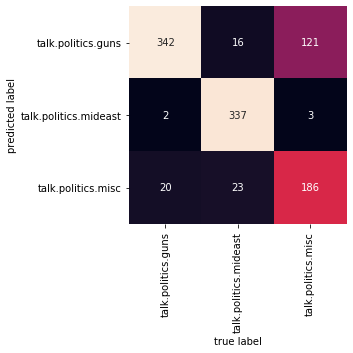

In [0]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(newsgroups_test.target, label1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=newsgroups_train.target_names, yticklabels=newsgroups_train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### vectorize the text samples into a 2D integer tensor

In [0]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 33300 unique tokens.


In [0]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (1575, 1000)
Shape of label tensor: (1575, 3)


In [0]:
# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

print('Preparing embedding matrix.')

Preparing embedding matrix.


In [0]:
word_index.items()

dict_items([('the', 1), ('of', 2), ('to', 3), ('and', 4), ('in', 5), ('a', 6), ('that', 7), ('i', 8), ('is', 9), ('it', 10), ('you', 11), ('for', 12), ('not', 13), ('are', 14), ('from', 15), ('on', 16), ('was', 17), ('they', 18), ('this', 19), ('have', 20), ('be', 21), ('as', 22), ('edu', 23), ('with', 24), ('by', 25), ('or', 26), ('but', 27), ('if', 28), ('we', 29), ('were', 30), ('all', 31), ('at', 32), ('there', 33), ('people', 34), ('what', 35), ('would', 36), ('com', 37), ('no', 38), ('an', 39), ('their', 40), ('he', 41), ('who', 42), ('do', 43), ('about', 44), ('one', 45), ('my', 46), ('will', 47), ('subject', 48), ('writes', 49), ('so', 50), ('lines', 51), ('article', 52), ('has', 53), ('your', 54), ('them', 55), ('had', 56), ('out', 57), ('organization', 58), ('re', 59), ('me', 60), ('more', 61), ('when', 62), ('can', 63), ("don't", 64), ('any', 65), ('some', 66), ('been', 67), ('which', 68), ('his', 69), ('just', 70), ('think', 71), ('up', 72), ('like', 73), ('only', 74), ('ot

### To train our models,we are going to use thoses helper functions

#### def deep_model(model, X_train, y_train, X_valid, y_valid)

In [0]:
#@title
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    return history

#### def eval_metric(history, metric_name):

In [0]:
#@title
def eval_metric(history, metric_name):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

In [0]:
#@title
def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    
    return results

In [0]:
NB_START_EPOCHS=20
BATCH_SIZE=128

## **Train word embeddings base model with 8 dimensions**

In [0]:
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2

In [0]:
from keras import models
from keras import layers

In [0]:
emb_model = models.Sequential()
emb_model.add(layers.Embedding(MAX_NUM_WORDS, 8, input_length=MAX_SEQUENCE_LENGTH))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(3, activation='softmax'))
emb_history = deep_model(emb_model, x_train, y_train, x_val, y_val)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










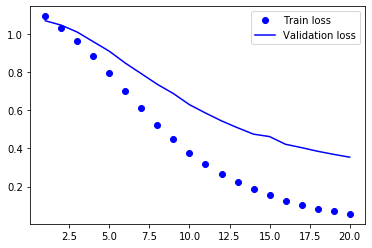

In [0]:
import matplotlib.pyplot as plt

eval_metric(emb_history, 'loss')

In [0]:
print('Accuracy of Embedding model: {0:.2f}%'.format(np.array(emb_history.history['val_acc']).mean()*100))

Accuracy of Embedding model: 77.25%


We have a validation accuracy of about 77.25%, so this result is rather good. By comparing the training and validation loss, we see that the model starts overfitting from epoch 2

This test result is quite ok, but let’s see if we can improve with pre-trained word embeddings.

## **Pre-trained word embeddings — Glove**

First, we put the word embeddings in a dictionary where the keys are the words and the values the word embeddings.

In [0]:
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
 
for word, i in word_index.items():
 
    embedding_vector = embeddings_index.get(word)
 
    if embedding_vector is not None:
 
        # words not found in embedding index will be all-zeros.
 
        embedding_matrix[i] = embedding_vector

In [0]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(len(word_index) + 1,
 
                            EMBEDDING_DIM,
 
                            weights=[embedding_matrix],
 
                            input_length=MAX_SEQUENCE_LENGTH,
 
                            trainable=False)

In [0]:
# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(3, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [0]:
glove_history = deep_model(model, x_train, y_train, x_val, y_val)

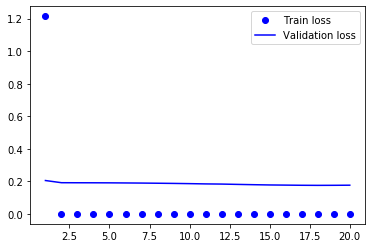

In [0]:
eval_metric(glove_history, 'loss')

In [0]:
print('Accuracy of word glove model: {0:.2f}%'.format(np.array(glove_history.history['val_acc']).mean()*100))

Accuracy of word glove model: 95.89%
